In [78]:
Sys.setlocale(category = "LC_CTYPE", locale = "en_US.UTF-8")



library(ggplot2)
library(psych)
library(GGally)
library(ggpubr)
library(dplyr) # For glimpse
library(rsm) # For RSM
library(leaps) # For Model selection
library(DAAG) # For VIF
library("olsrr")# For plot for Cook's Distance and DFBETAS
library(lmtest) # For Breusch-Pagan Test
library(car) # For Durbin-Watson test

[1] "en_US.UTF-8"

# 1. Global Variables

In [79]:
alpha <- 0.05
n     <- 0 # This value will be set to total number of repords in dataset

In [80]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=500)

# 2. Data Collection and Preparation

## 2.1. Data read from file

In [81]:
# file name
file_name <- "Happiness_Cleaned.csv"

# to dataframe
df_grid <- read.table(file_name, sep = ",", header=TRUE, fileEncoding = "latin1") # nolint

## 2.2. Preliminary Checks on Data Quality

### Basic study of Dataframe

In [82]:
head(df_grid, 15)

,Country,Happiness_Score,Population,Land_Area_.KM2.,Population_Density,Net_Migrants,Fertility_Rate,Median_Age,Urban_Population_Percentage,Developed_Developing,Human_Development_Index,Health_Care_Index,Constitutional_Form,Literacy_Rate,Latitude,Longitude,River_.Sq.KM.,River_to_Land_Percent,Pollution_PM2_5
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Afghanistan,1.72,42239854,652860,65,-65846,4.4,17,26,Developing,0.478,45.00,Provisional,0.3817,33.00,65.00,0,0.00,15.0
2,Albania,5.30,2832439,27400,103,-8000,1.4,38,67,Developing,0.796,48.86,Republic,0.9755,41.00,20.00,1350,4.93,14.5
3,Algeria,5.36,45606480,2381740,19,-9999,2.8,28,75,Developing,0.745,49.00,Republic,0.7961,28.00,3.00,0,0.00,17.8
4,Argentina,6.19,45773884,2736690,17,3718,1.9,32,94,Developed,0.842,50.04,Republic,0.9809,-34.00,-64.00,43710,1.60,7.7
5,Armenia,5.46,2777970,28470,98,-5000,1.6,35,67,Developing,0.759,48.71,Republic,0.9977,40.00,45.00,1540,5.41,31.4
6,Australia,7.06,26439111,7682300,3,139991,1.6,38,86,Developed,0.951,57.77,Constitutional monarchy,0.9900,-27.00,133.00,58920,0.77,4.2
7,Austria,6.91,8958960,82409,109,19999,1.5,43,59,Developed,0.916,54.69,Republic,0.9800,47.33,13.33,1426,1.73,10.6
8,Azerbaijan,4.89,10412651,82658,126,0,1.7,32,57,Developing,0.745,48.66,Republic,0.9981,40.50,47.50,3971,4.80,18.9
9,Bahrain,5.96,1485509,760,1955,0,1.8,34,60,Developed,0.875,52.83,Constitutional monarchy,0.9572,26.00,50.55,0,0.00,66.6


In [83]:
n <- nrow(df_grid)
print(n)

[1] 137


In [84]:
glimpse(df_grid)

Rows: 137
Columns: 19
$ Country                     <chr> "Afghanistan", "Albania", "Algeria", "Arge…
$ Happiness_Score             <dbl> 1.72, 5.30, 5.36, 6.19, 5.46, 7.06, 6.91, …
$ Population                  <int> 42239854, 2832439, 45606480, 45773884, 277…
$ Land_Area_.KM2.             <int> 652860, 27400, 2381740, 2736690, 28470, 76…
$ Population_Density          <int> 65, 103, 19, 17, 98, 3, 109, 126, 1955, 13…
$ Net_Migrants                <int> -65846, -8000, -9999, 3718, -5000, 139991,…
$ Fertility_Rate              <dbl> 4.4, 1.4, 2.8, 1.9, 1.6, 1.6, 1.5, 1.7, 1.…
$ Median_Age                  <int> 17, 38, 28, 32, 35, 38, 43, 32, 34, 27, 41…
$ Urban_Population_Percentage <int> 26, 67, 75, 94, 67, 86, 59, 57, 60, 41, 99…
$ Developed_Developing        <chr> "Developing", "Developing", "Developing", …
$ Human_Development_Index     <dbl> 0.478, 0.796, 0.745, 0.842, 0.759, 0.951, …
$ Health_Care_Index           <dbl> 45.00, 48.86, 49.00, 50.04, 48.71, 57.77, …
$ Constitutional_F

## 2.3. Box plots for dependent and independent variables

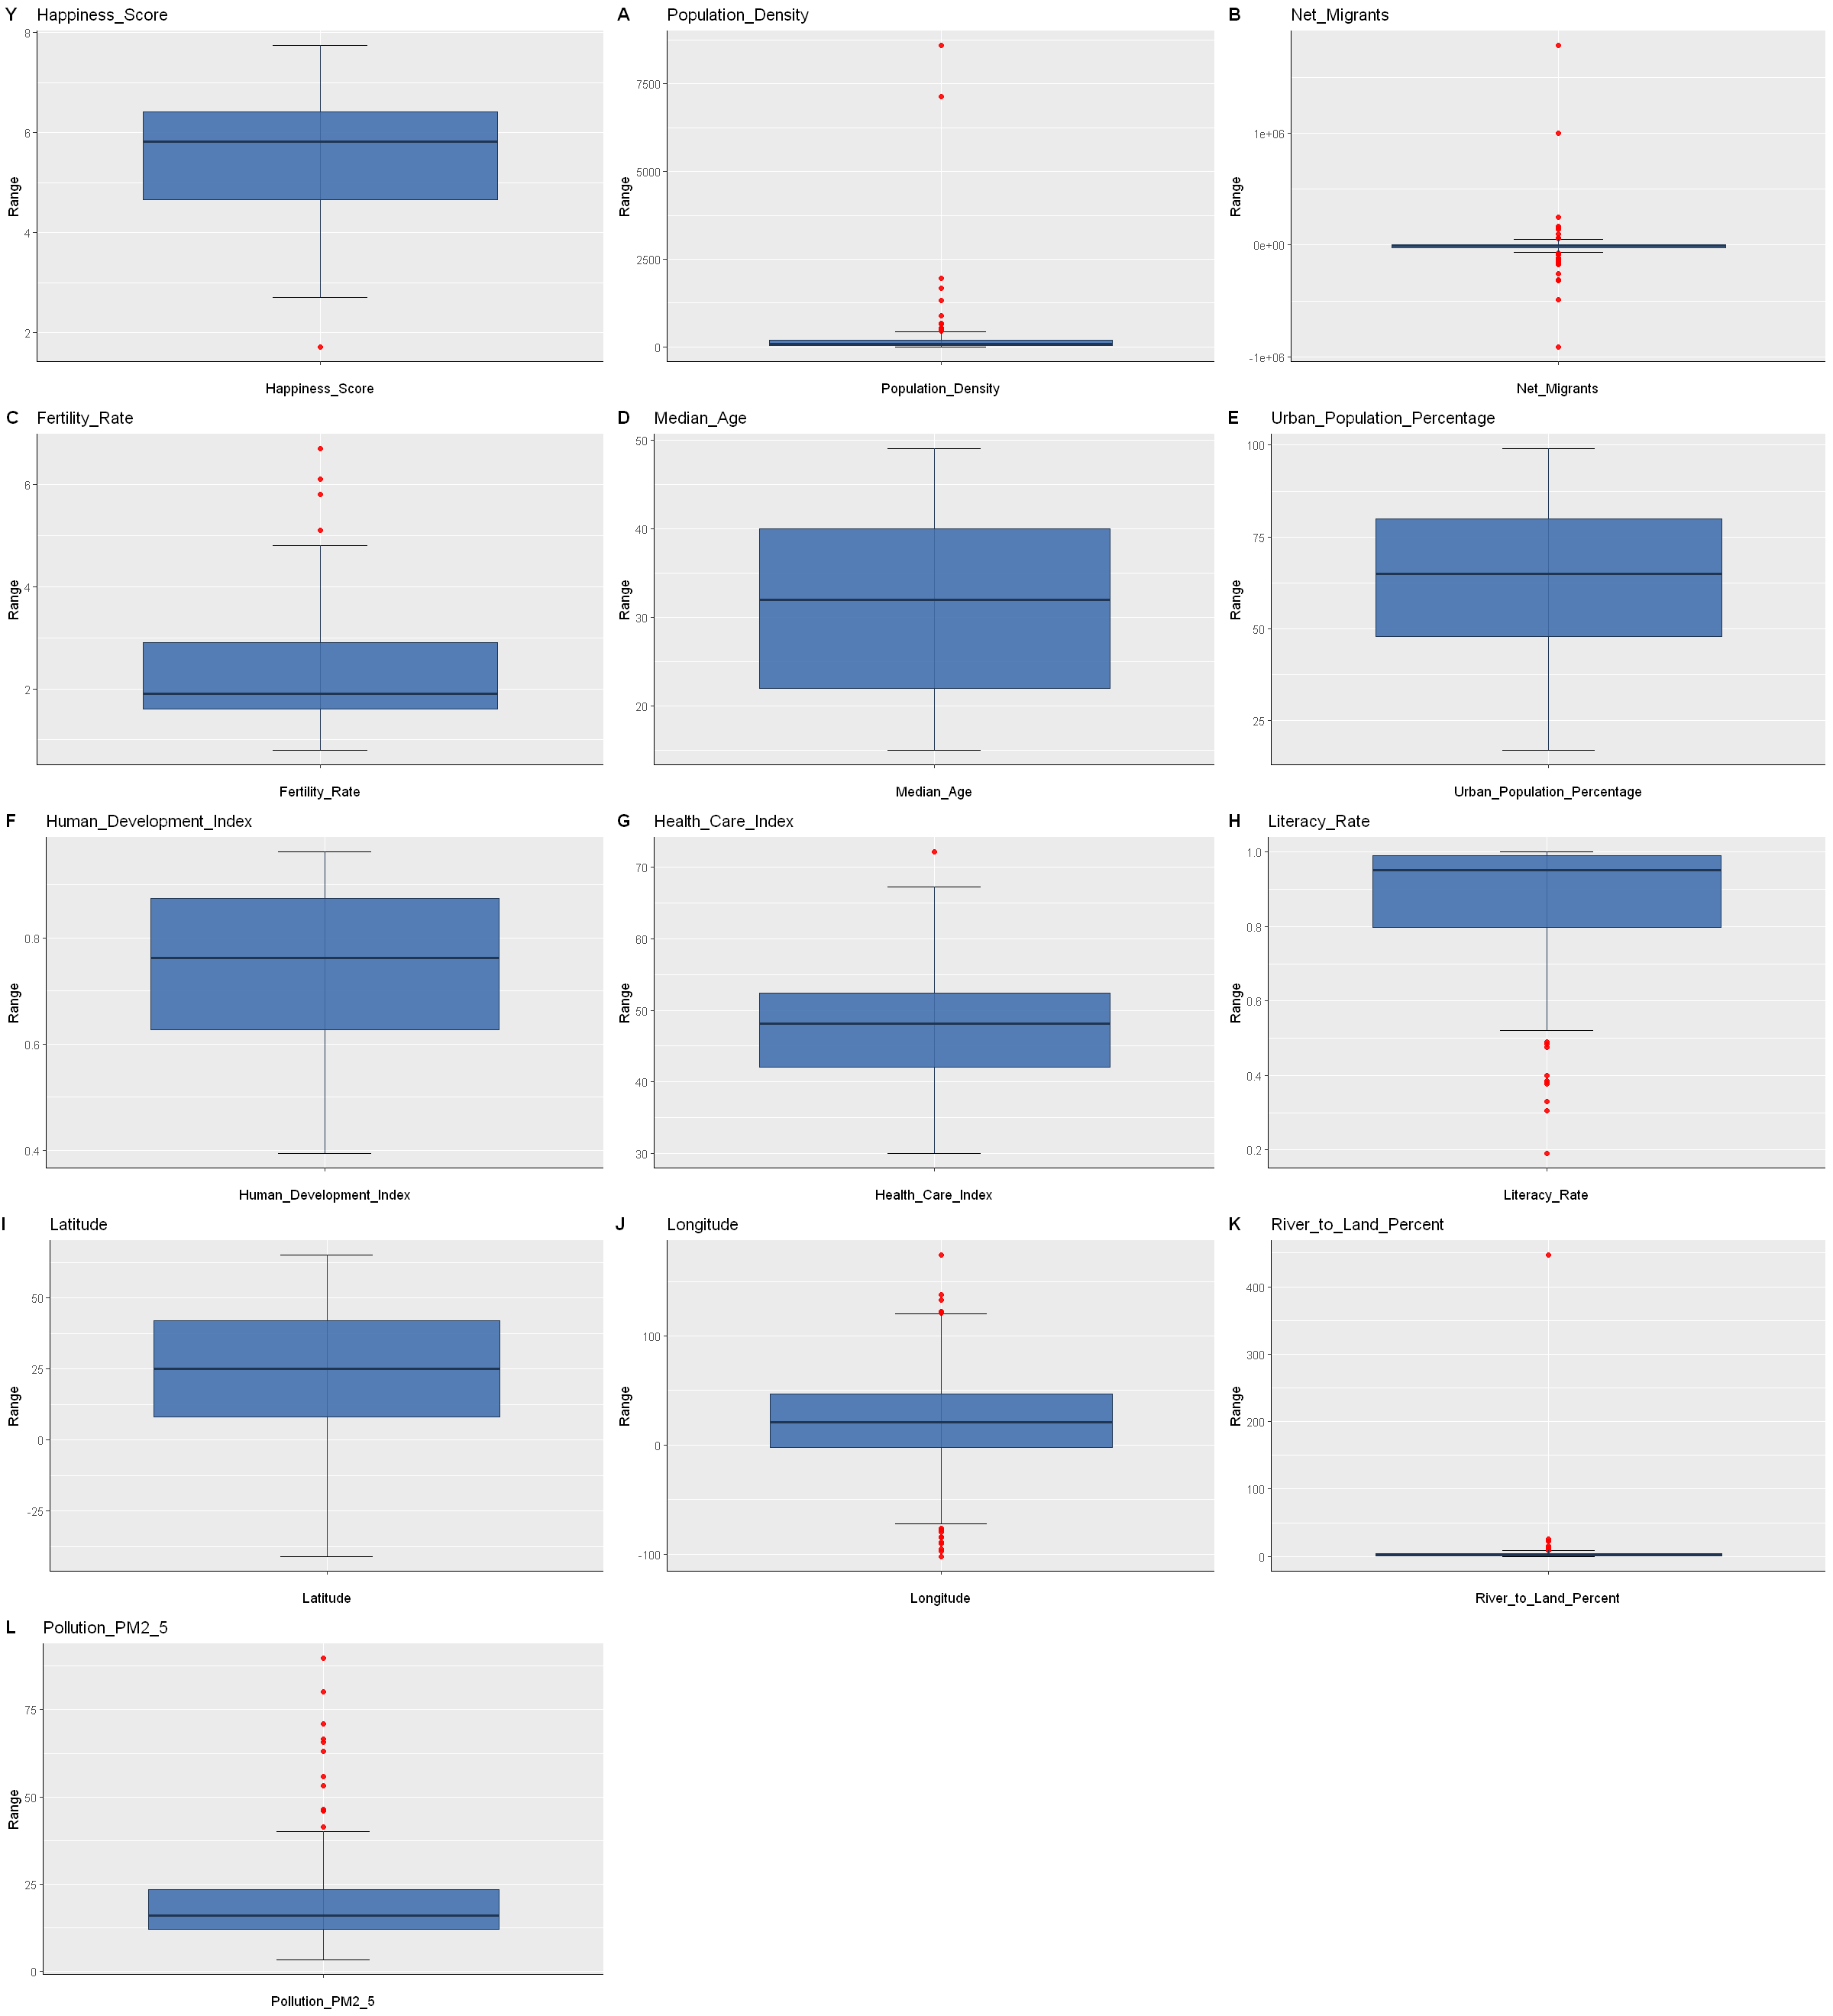

In [85]:
options(repr.plot.width=20, repr.plot.height=22)
plotList <- lapply(
                    c('Happiness_Score', 'Population_Density', 'Net_Migrants', 'Fertility_Rate', 'Median_Age',
                      'Urban_Population_Percentage', 'Human_Development_Index', 'Health_Care_Index', 'Literacy_Rate',
                      'Latitude', 'Longitude', 'River_to_Land_Percent', 'Pollution_PM2_5'),
                    function(key)
                    {
                        custom_plot <- ggplot(data=df_grid, aes(x="", y=eval(parse(text = key)))) +
                        stat_boxplot(geom = "errorbar", width = 0.2) + # Boxplot with error bars
                        geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.9, outlier.colour="red") +
                        scale_y_continuous(name="Range") + # Y label
                        scale_x_discrete(name=key) + # X label
                        ggtitle(key) + # Plot title
                        theme(axis.line = element_line(colour = "black", linewidth = 0.25)) # Theme customization #nolint
                    }
)
allplots <- ggarrange( plotlist=plotList, 
labels = c("Y", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"), # nolint
ncol = 3, nrow = 5)
allplots

<div style="background-color: #00f0f0; padding: 15px; border: 2px solid black; border-radius: 5px;">

<b>Following important points are observed from study of individual variables</b>

<ul>
  <li><b>Related to outliers:</b>
    <ul>
      <li>Attributes <i>Population Density</i>, <i>Net Migrants</i>, and <i>River to Land Percent</i> have very wide outliers.</li>
      <li>There exist few outliers for attributes <i>Fertility Rate</i>, <i>Literacy Rate</i>, <i>Longitude</i>, and <i>Population PM 2.5</i>.</li>
      <li>No outliers are observed for all other attributes.</li>
    </ul>
  </li>

  <li><b style="font-weight: bold;">It can also be observed that range for different attributes vary a lot.</b> 
    E.g. <i>literacy rate</i> value ranges from 0 to 1, whereas <i>population density</i>, <i>net migrants</i> ranges in thousands, 
    it arises need of some standardization technique.
  </li>
</ul>

</div>
